## Theoretical background

The discretizing process is all about selecting some discrete points to represent the best a continuous space. One way to evaluate a discretization is to check for the __error__ it creates. I call this __error__  $ME$ (Mean Error) and it is actually the average distance of all the continuous points of that space, to their nearest discrete ones.

Before digging into the maths, i will explain some basic annotation.
* $n$ is always the number of dimensions of our space.
* $x$ is the variable vector point in that space
* $k$ is the number of the discrete points
* $x_{i}$ is the i-th discrete point
* $a$,$b$ is the start and the end of the space ($a\neq b$)

Lets assume at the beginning we have a __signle dimensional__ ($n = 1$) continuous range and __one__ ($k=1$) point $x_{0}$ inside that range. The distance to any other point  $x$  is the Eucledian distance which for  $n=1$  equals to  $|x-x_{0}|$. The corresponding $ME$ for that dicretizations is the average distance to any other point in the given range $(a, b)$.

$$ ME(x_0) = \large\frac{total \: distance}{range} = \frac{\int_{a}^{b}|x-x_0|dx}{b-a} $$

Solving this integral gives us:
$$ ME(x_0) = \large\frac{x_0^2 + (a+b)x_0+\frac{a^2+b^2}{2}}{b-a}$$

The result is a quadratic function. The goal is to find the $x_0$ that minimizes $ME$.

  
$$  ME' = \frac{2x_0-a-b}{b-a} $$

$$  ME' = 0  \Leftrightarrow  $$
  
$$  x_0 = \frac{a+b}{2} $$

As expected, the minimum is located a the center and its value is...

$$ ME(x_0) = \dots = \frac{b-a}{4} $$


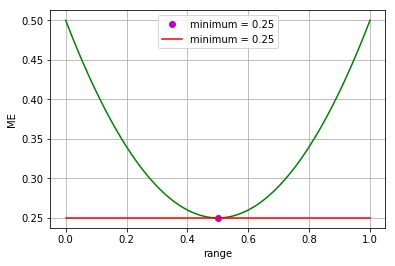

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def ME(x_0, a, b):
    return (x_0**2 - (a+b)*x_0 + (a**2 + b**2)/2)/(b-a)

# ex. a=0, b=1
a = 0
b = 1
x = np.linspace(a, b, 101)
y = list(ME(x_i, a, b) for x_i in x)

x_min = (a+b)/2
y_min = ME(x_min, a, b)

plt.plot(x, y, 'g')
plt.plot(x_min, y_min, 'mo', label='minimum = {}'.format(y_min))
plt.plot([a, b], [y_min]*2, 'r')
plt.xlabel('range')
plt.ylabel('ME')
plt.grid(True)
plt.legend()
plt.show()

#### Adding more discrete points

To decrease further this error, or to increase the precision of our discretization, we can add more discrete points and split the initial range to sub-ranges for each point. The problem now is to find where to place all these points, and what ranges to assign to each.

Actually the ranges are assigned automatically due to the fact that we calculate the mean error from the __nearest__ discrete point. So the range of each point is __half the distance__ to its nearest neighbor point or the limits $a,b$. What we did actually is that we split our initial range $[a, b]$ to $k$ sub-ranges $[a_0, b_0], [a_1, b_1], \dots, [a_k-1, b_k-1]$ where the end of one sub-range is the beggining of the next.

The $ME$ is now calculated like so:

$$ ME = \large\frac{total \: distance}{range} $$     
$$ = \frac{\sum_{i=0}^{k}\int_{a_i}^{b_i}|x-x_i|dx}{b-a} $$     
$$ = \frac1{b-a}\sum_{i=0}^{k}x_i^2 + (a_i+b_i)x_i+\frac{a_i^2+b_i^2}{2} $$     

Another way to express this using the $ME$ of each point independently is:

$$ ME = \frac1{b-a}\sum_{i=0}^{k}x_i^2 + (a_i+b_i)x_i+\frac{a_i^2+b_i^2}{2} $$     

$$ = \frac{1}{b-a}\sum_{i=0}^{k}\frac{(b_i-a_i)}{(b_i-a_i)} * x_i^2 + (a_i+b_i)x_i+\frac{a_i^2+b_i^2}{2} $$     

$$ = \sum_{i=0}^{k}\frac{b_i-a_i}{b-a} * \frac{x_i^2 + (a_i+b_i)x_i+\frac{a_i^2+b_i^2}{2}}{b_i-a_i} $$     

$$ = \sum_{i=0}^{k}w_i*ME(x_i) $$     

Where $\large w_i=\frac{b_i-a_i}{b-a}$ and is the weight of each $ME_i$ according to its range. 

We proved earlier that it is always better to have each point in the middle of its range. That means we can rewrite the formula of $ME$ like so:

$$ ME = \sum_{i=0}^{k}w_i*ME(x_i) $$


$$ = \sum_{i=0}^{k}\frac{b_i-a_i}{b-a} \frac{b_i-a_i}{4} $$     

$$ = \sum_{i=0}^{k}\frac{(b_i-a_i)^2}{4(b-a)}$$     

$$ = \frac{1}{4(b-a)}\sum_{i=0}^{k}(b_i-a_i)^2$$     



ranges [0.         0.1635987  0.53294497 0.58593406 1.        ] 

discrete points [0.08179934799584165, 0.3482718326282517, 0.5594395149528911, 0.7929670303204811]
ME(0.08179934799584165, a=0.0, b=0.1635986959916833) = 0.04089967399792083
ME(0.3482718326282517, a=0.1635986959916833, b=0.53294496926482) = 0.09233656831828418
ME(0.5594395149528911, a=0.53294496926482, b=0.5859340606409622) = 0.0132472728440353
ME(0.7929670303204811, a=0.5859340606409622, b=1.0) = 0.10351648483975945


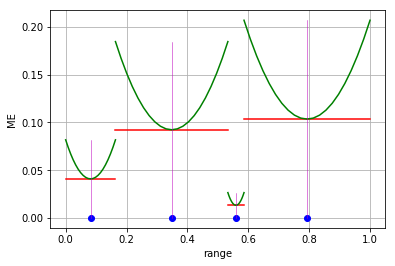

weights [0.1635986959916833, 0.36934627327313674, 0.05298909137614216, 0.4140659393590378]
weighted MEs [0.00669113 0.03410417 0.00070196 0.04286265]

-->mean error 0.08435991221327133


In [119]:
# pick 4 random points in range [0, 1]
k = 4
ranges = np.array([a])
ranges = np.append(ranges, np.sort(np.random.uniform(a, b, size=k-1)))
ranges = np.append(ranges, b)
print('ranges', ranges,'\n')

x_is = list((ranges[i]+ranges[i+1])/2 for i in range(k))
print('discrete points', x_is)

# plot
MEs = list(ME(x_is[i], ranges[i], ranges[i+1]) for i in range(len(x_is)))
for i in range(len(x_is)):
    print('ME({}, a={}, b={}) = {}'.format(x_is[i], ranges[i], ranges[i+1], MEs[i]))
    plt.plot(x_is[i], 0, 'bo')
    plt.plot([ranges[i], ranges[i+1]], [MEs[i]]*2, 'r')
    x = np.linspace(ranges[i], ranges[i+1], 21)
    y = list(ME(x_i, ranges[i], ranges[i+1]) for x_i in x)
    plt.plot(x, y, 'g')
    plt.plot([x_is[i], x_is[i]], [0, y[0]], 'm', linewidth=.5)

plt.xlabel('range')
plt.ylabel('ME')
plt.grid(True)
plt.show()
plt.show()

# apply weights one each ME according to each range's lenght
weights = list((ranges[i+1] - ranges[i])/(b-a) for i in range(k))
print('weights', weights)
weighted_MEs = np.multiply(weights, MEs)
print('weighted MEs', weighted_MEs)

print('\n-->mean error', np.sum(weighted_MEs))

#### Optimizing
The example above shows that even with a random discretization, the $ME$ is decreased by a great amount. Though, if we chose more wisely the locations of the points, we could achieve an even lower mean error. Βringing the points on the center of the ranges is not the only optimazation that can be done. As we can see, our function depends exponentialy from the lenght of the ranges that we split the space. That means the only thing that matters for the ranges, is to make them as small as they can get. Because the actual values of $a_i$s and $b_i$s don't play any role, only the length of the range the define, from now on i will refer to them as $l_i$s, and $l$ for the $a-b$, where
$$\sum_{i=0}^{k}{l_i}=b-a=l$$

$$ ME = \frac{1}{4l}\sum_{i=0}^{k}l_i^2$$

That means the only thing that matters for the ranges, is to make them as small as they can get. Intuitively we can think that the minimum is where all the ranges have the same length, which means that the uniform discretization is optimal. One way to prove it is by using the **Cauchy–Schwarz inequality**([TMM's idea](https://math.stackexchange.com/questions/67192/how-to-prove-the-sum-of-squares-is-minimum)).

$$(\sum_{i=0}^{k}{x_iy_i})^2 \leq \sum_{i=0}^{k}{x_i}^2\sum_{i=0}^{k}{y_i}^2$$

In our case we don't have $y_i$s so we set it equal to 1 with sum $=k$ of course, and our $x_i$s are actually $d_i$s.

$$(\sum_{i=0}^{k}{l_i})^2 \leq k\sum_{i=0}^{k}{l_i}^2$$

Because the ranges come up from a split, if we merge them again we get the initial range, which means that:

$$\sum_{i=0}^{k}{l_i}=l$$

Combining we get:

$$l^2 \leq k\sum_{i=0}^{k}{l_i}^2$$

Lets assume:
$$ l_i = \frac{l}{k} \rightarrow$$

$$\frac1k\sum_{i=0}^{k}{l_i}^2 = k*k\frac{l^2}{k^2} = l^2$$

That $l_i$ achieve the lowest bound, and **proves that the uniform discretization is optimal**.
$$ ME = \frac{1}{4l}\sum_{i=0}^{k}l_i^2$$
$$ = \frac{1}{4l}k\frac{l^2}{k^2}$$
$$ = \frac{1}{4l}\frac{l^2}{k}$$
$$ = \frac{l}{4k}$$



ranges [0.   0.25 0.5  0.75 1.  ] 

discrete points [0.125, 0.375, 0.625, 0.875]
ME(0.125, a=0.0, b=0.25) = 0.0625
ME(0.375, a=0.25, b=0.5) = 0.0625
ME(0.625, a=0.5, b=0.75) = 0.0625
ME(0.875, a=0.75, b=1.0) = 0.0625


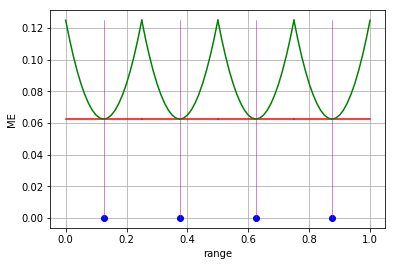

weights [0.25, 0.25, 0.25, 0.25]
weighted MEs [0.015625 0.015625 0.015625 0.015625]

-->mean error 0.0625


In [121]:
# applying uniform discretization to our previous example, expecting ME = 0.0625
# pick 4 uniform spaced points in range [0, 1]
k = 4
ranges = np.linspace(a, b, k+1)
print('ranges', ranges,'\n')

x_is = list((ranges[i]+ranges[i+1])/2 for i in range(k))
print('discrete points', x_is)

# plot
MEs = list(ME(x_is[i], ranges[i], ranges[i+1]) for i in range(len(x_is)))
for i in range(len(x_is)):
    print('ME({}, a={}, b={}) = {}'.format(x_is[i], ranges[i], ranges[i+1], MEs[i]))
    plt.plot(x_is[i], 0, 'bo')
    plt.plot([ranges[i], ranges[i+1]], [MEs[i]]*2, 'r')
    x = np.linspace(ranges[i], ranges[i+1], 21)
    y = list(ME(x_i, ranges[i], ranges[i+1]) for x_i in x)
    plt.plot(x, y, 'g')
    plt.plot([x_is[i], x_is[i]], [0, y[0]], 'm', linewidth=.5)

plt.xlabel('range')
plt.ylabel('ME')
plt.grid(True)
plt.show()
plt.show()

# apply weights one each ME according to each range's lenght
weights = list((ranges[i+1] - ranges[i])/(b-a) for i in range(k))
print('weights', weights)
weighted_MEs = np.multiply(weights, MEs)
print('weighted MEs', weighted_MEs)

print('\n-->mean error', np.sum(weighted_MEs))


#### Generalizing over any number of dimension
So we show the basic principles of discretizing a single dimension space.

* Points are now vectors and have $n$ components.
 $$ \hat x =  [x_0, x_1, \dots,x_{n-1} ]$$

* Instead of using $a,b$, we are annotate the space but its length on every axis, as we proved that it is the only thing that matters on the space.  
$$ \hat l =  [l_0, l_1, \dots,l_{n-1} ]$$

* The distance between a continuous point $\hat y$ and its nearest discrete $\hat x_i$ is the Euclidean norm.
$$ distance = |\hat y - \hat x_i|=\sqrt{\sum_{j=0}^{n-1}{(y_j-x_{i_j})^2}}$$

* Range now is region of space and for a given point $\hat x_i$ is calculated through:
$$ space(\hat x_i) = \prod_{j=0}^{n-1}l_{i_j} = l_{i_1} l_{i_2} \dots  l_{i_{n-1}} $$

* The simplified formulas for $ME$ are a special case for $n=1$ and cannot be applied in a any other case. So the mean error is calculated through:
$$ ME(\hat x_i) = \frac{total\:distance}{space} = \frac{\int_{0}^{l_{i_1}}\int_{0}^{l_{i_2}}\dots\int_{0}^{l_{i_{n-1}}}\sqrt{(y_1-x_{i_1})^2+(y_2-x_{i_2})^2+\dots+(y_{n-1}-x_{i_{n-1}})^2}dy_{n-1} \dots dy_2 dy_1}{l_{i_1} l_{i_2} \dots  l_{i_{n-1}}}$$     
